# Purpose
For each data type consolidate all of the trial data, averaging across STAs to find the baseline of a signal, the excursion and peak times. This script compiles the data that makes up Table 1. 

In [1]:
import numpy as np
import pandas
import glob
import scipy.io

# Plot parameters 
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'Tahoma',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')





In [2]:
acceptable_trials = ['m07_t01_15', 'm07_t03_15', 'm07_t06_15','m10_t02_16','m11_t02_16','m11_t04_16',
                   'm12_t02_16', 'm14_t03_16','m14_t05_16', 'm15_t01_16', 'm15_t03_16']

In [3]:
# Import the permutation bootstrap data. 
perm_bootstrap = pandas.read_csv('Perm_bootstrap.csv')
perm_bootstrap

,Unnamed: 0,Trial,D10,M6_c,M3_c,A51_c,A59_c,I20_I10
0,0,m07_t01_15,0.0,2.7,0.0,25.9,64.5,0.0
1,1,m07_t03_15,0.0,0.2,47.9,41.2,85.9,9.8
2,2,m07_t06_15,4.6,1.6,56.0,8.9,0.2,1.9
3,3,m10_t02_16,0.0,14.1,0.8,0.6,26.8,0.0
4,4,m11_t02_16,0.0,0.0,0.0,20.3,0.8,97.1
5,5,m11_t04_16,0.0,0.0,0.1,3.7,35.5,0.1
6,6,m12_t02_16,0.0,0.1,2.7,1.3,0.1,0.8
7,7,m14_t03_16,0.0,15.5,0.0,47.7,0.0,0.0
8,8,m14_t05_16,0.0,94.3,65.2,3.3,0.0,0.0
9,9,m15_t01_16,0.0,70.3,28.0,19.4,0.0,0.0


In [4]:
# Create an dataframe with a column of the trials. To this dataframe I'll add the mean, excursion and time of peak for each trial

summary = pandas.DataFrame({'Trial' : acceptable_trials})  

# Prescribe the full size of summary and all of the columns names

column_names = ['M6_c', 'M3_c', 'D10', 'A59_c', 'A51_c', 'I20_I10']
suffixes = ['_baseline', '_peak_time', '_excursion_abs', '_excursion_prop'] # _abs is nanometer values, prop is proportion of the mean

a = np.full((len(summary)), np.nan)
for column_name in column_names:
    name = column_name + '_peak_time'
    summary[name] = a
    for suffix in suffixes:
        name = column_name + suffix
        summary[name] = a
        
summary

,Trial,M6_c_peak_time,M6_c_baseline,M6_c_excursion_abs,M6_c_excursion_prop,M3_c_peak_time,M3_c_baseline,M3_c_excursion_abs,M3_c_excursion_prop,D10_peak_time,...,A59_c_excursion_abs,A59_c_excursion_prop,A51_c_peak_time,A51_c_baseline,A51_c_excursion_abs,A51_c_excursion_prop,I20_I10_peak_time,I20_I10_baseline,I20_I10_excursion_abs,I20_I10_excursion_prop
0,m07_t01_15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,m07_t03_15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,m07_t06_15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,m10_t02_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,m11_t02_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,m11_t04_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,m12_t02_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,m14_t03_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,m14_t05_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,m15_t01_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


m07_t01_15


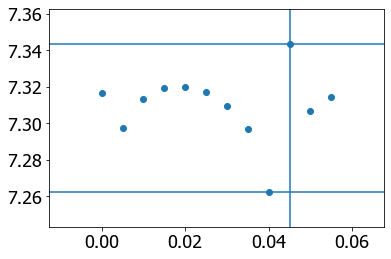

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


m07_t03_15


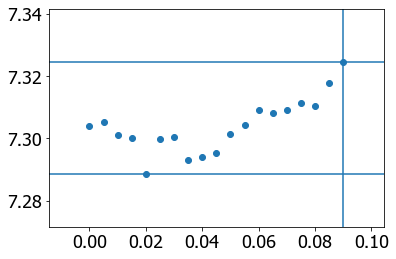

m07_t06_15


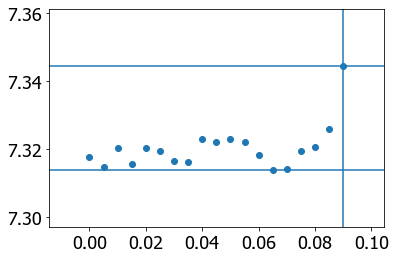

m10_t02_16
m11_t02_16


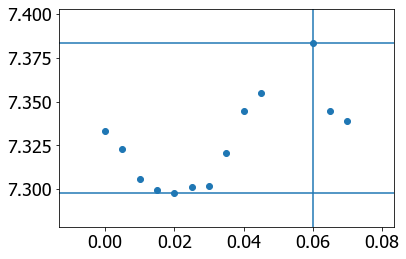

m11_t04_16


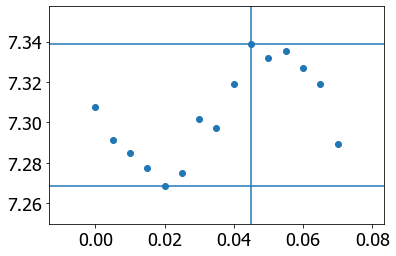

m12_t02_16


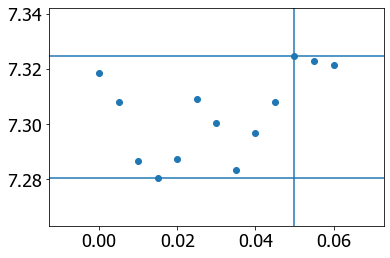

m14_t03_16
m14_t05_16
m15_t01_16
m15_t03_16


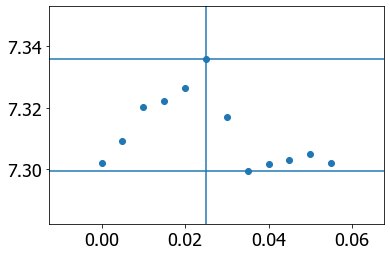

In [25]:
means = []
issues = []
ind = 0

column_names = ['M6_c']#['I20_I10', 'M6_c', 'M3_c', 'A59_c', 'A51_c', 'D10']

for trial in acceptable_trials:
    print(trial)
    file = '../DataProcessing/ProcessedData/' + trial + '_det.csv'
    d = pandas.read_csv(file) 
    
    for column_name in column_names:
        
        # First asses how large the permutation bootstrap is; 
        # we want all values for this column to be nans if the bootstrap was over 5%
        
        try:
            bootstrap_indicator = float(perm_bootstrap.where(perm_bootstrap.Trial == trial).dropna(how = 'all')[column_name])
            if bootstrap_indicator < 5:

                average = d[column_name].mean()

                list_ISIs = []    # Each ISI will be appended to this list
                len_ISIs = []     # A list of the length of ISIs so that the maximum length can be determined. 
                                  # This will determine how many columns are in the df.

                for i in np.arange(0,d.ISI.max()):
                    temp = d.where(d.ISI == i).dropna(how = 'all').reset_index() # I don't want to drop where there is a single nan, causing a frame shift, 
                                                                                 # but only where all vals are nans due to using the where function.
                                                                                 # Therefore the option "all" is used.
                    list_ISIs.append(np.array(temp[column_name]))
                    len_ISIs.append(len(temp))

                length = np.max(len_ISIs)

                col_titles = []
                for i in np.arange(0,length):
                    col_titles.append(str(i))

                ISIs_in_rows = pandas.DataFrame(list_ISIs, columns = col_titles) # Puts nans on the end of ISIs shorter than the longest
                
                # When limited to one column at a time, these plots confirm that the peak time identification,
                # and maximum and minimum finding are correct 
                
                plt.scatter(np.arange(0,len(ISIs_in_rows.mean()))*(1/200), ISIs_in_rows.mean())
                plt.axvline(float(ISIs_in_rows.mean().idxmax())*(1/200), 0, 1)
                plt.axhline(ISIs_in_rows.mean().min(), 0, 1)
                plt.axhline(ISIs_in_rows.mean().max(), 0, 1)
                plt.show()
                
                
                summary[column_name + '_baseline'].iloc[ind] = ISIs_in_rows.mean().min()
                summary[column_name + '_peak_time'].iloc[ind] = float(ISIs_in_rows.mean().idxmax())*(1/200)
                summary[column_name + '_excursion_abs'].iloc[ind] = ISIs_in_rows.mean().max() - ISIs_in_rows.mean().min()
                summary[column_name + '_excursion_prop'].iloc[ind] = (ISIs_in_rows.mean().max() - ISIs_in_rows.mean().min())/ISIs_in_rows.mean().min()

            else:
                summary[column_name + '_baseline'].iloc[ind] = np.nan 
                summary[column_name + '_peak_time'].iloc[ind] = np.nan 
                summary[column_name + '_excursion_abs'].iloc[ind] = np.nan 
                summary[column_name + '_excursion_prop'].iloc[ind] = np.nan 
                
        except: 
            print('Failed on ', trial, ' ', column_name)
    ind += 1

In [6]:
summary

,Trial,M6_c_peak_time,M6_c_baseline,M6_c_excursion_abs,M6_c_excursion_prop,M3_c_peak_time,M3_c_baseline,M3_c_excursion_abs,M3_c_excursion_prop,D10_peak_time,...,A59_c_excursion_abs,A59_c_excursion_prop,A51_c_peak_time,A51_c_baseline,A51_c_excursion_abs,A51_c_excursion_prop,I20_I10_peak_time,I20_I10_baseline,I20_I10_excursion_abs,I20_I10_excursion_prop
0,m07_t01_15,0.045,7.262383,0.080680,0.011109,0.020,14.180593,0.301345,0.021250,0.025,...,NaN,NaN,NaN,NaN,NaN,NaN,0.015,0.787728,0.167485,0.212618
1,m07_t03_15,0.090,7.288535,0.035840,0.004917,NaN,NaN,NaN,NaN,0.015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,m07_t06_15,0.090,7.313740,0.030713,0.004199,NaN,NaN,NaN,NaN,0.080,...,0.018304,0.003087,NaN,NaN,NaN,NaN,0.090,0.773014,0.100144,0.129550
3,m10_t02_16,NaN,NaN,NaN,NaN,0.025,14.209579,0.220675,0.015530,0.050,...,NaN,NaN,0.060,5.051401,0.160005,0.031675,0.010,0.776544,0.731717,0.942274
4,m11_t02_16,0.060,7.298019,0.085241,0.011680,0.060,14.208114,0.441814,0.031096,0.025,...,0.083552,0.014276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,m11_t04_16,0.045,7.268392,0.070383,0.009683,0.070,14.307848,0.455098,0.031808,0.025,...,NaN,NaN,0.065,5.077479,0.062796,0.012368,0.035,0.545055,0.279722,0.513199
6,m12_t02_16,0.050,7.280527,0.043971,0.006040,0.055,14.376942,0.220378,0.015329,0.035,...,0.080722,0.013742,0.060,5.066842,0.057811,0.011410,0.020,0.730271,0.137919,0.188860
7,m14_t03_16,NaN,NaN,NaN,NaN,0.005,14.284956,0.137761,0.009644,0.025,...,0.120856,0.020633,NaN,NaN,NaN,NaN,0.000,0.726600,0.320610,0.441247
8,m14_t05_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025,...,0.029446,0.005060,0.065,5.017922,0.082127,0.016367,0.020,0.693191,0.325380,0.469395
9,m15_t01_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025,...,0.058720,0.010023,NaN,NaN,NaN,NaN,0.015,0.681758,0.090641,0.132953


In [15]:
suffixes = ['_baseline', '_excursion_abs', '_excursion_prop', '_peak_time']
dtype = 'D10'
for s in suffixes: 
    print('number ', len(summary[dtype + '_baseline'].dropna(how = 'all')))
    print(s, ' mean ', summary[dtype + s].mean())
    print(s, ' SD ', summary[dtype + s].std())

number  11
_baseline  mean  45.83537647379309
_baseline  SD  0.8746846812053252
number  11
_excursion_abs  mean  1.241600293821356
_excursion_abs  SD  0.6559865815415729
number  11
_excursion_prop  mean  0.02720056574528221
_excursion_prop  SD  0.014645192040646177
number  11
_peak_time  mean  0.03227272727272728
_peak_time  SD  0.018078113336799886


In [24]:
# Calculate the mean wingbeat frequency

wb_freqs = []

for trial in acceptable_trials:
    print(trial)
    file = '../DataProcessing/ProcessedData/' + trial + '_det.csv'
    d = pandas.read_csv(file)
    wb_freqs.append(d.peaks.sum()/(d.seconds.iloc[-1] - d.seconds.iloc[0]))

print('average: ', np.mean(np.array(wb_freqs)), 'SD: ', np.std(np.array(wb_freqs)), 'minimum: ', np.min(np.array(wb_freqs)), 'maximum: ', np.max(np.array(wb_freqs)))
wb_freqs


m07_t01_15
m07_t03_15
m07_t06_15
m10_t02_16
m11_t02_16
m11_t04_16
m12_t02_16
m14_t03_16
m14_t05_16
m15_t01_16
m15_t03_16
average:  16.246773564261016 SD:  1.7894459028526932 minimum:  12.738853503184712 maximum:  18.579234972677593


[17.77777777777778,
 15.64245810055866,
 12.738853503184712,
 16.129032258064512,
 13.872832369942197,
 15.2046783625731,
 17.964071856287426,
 18.579234972677593,
 17.877094972067038,
 15.384615384615383,
 17.54385964912281]

In [21]:
d.peaks.sum()/(d.seconds.iloc[-1] - d.seconds.iloc[0])

17.54385964912281

In [19]:
d.seconds.iloc[-1]

0.96

In [20]:
d.seconds

0      0.105
1      0.110
2      0.115
3      0.120
4      0.125
       ...  
167    0.940
168    0.945
169    0.950
170    0.955
171    0.960
Name: seconds, Length: 172, dtype: float64